### 0. Initialisation

In [1]:
save_path = "/Users/aljoscha/Downloads/locustVR_data"

import os,json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import importlib

from LocustVR_data_analysis import utils_local

importlib.reload(utils_local)
from LocustVR_data_analysis.utils_local import default_style

### 2. Load data

In [2]:
df = pd.read_pickle(os.path.join(save_path, 'locustvr_data.pkl'))

In [3]:
grouped = df.groupby("animal_id")["trial_id"].agg(["max", "nunique"])
print(grouped)

           max  nunique
animal_id              
0           31       32
1           29       30
2           31       32
3           14       15
4           31       32
5           34       35
6           35       36
7           18       19
8           26       27
9           25       26
10          21       22
11          25       26
12          30       31
13           6        7
14          34       35
15          26       27
16          32       33
17          28       29
18          33       34
19          27       28
20          21       22
21          30       31


In [4]:
print(df)

                  X           Y   heading     ts  trial_id  state_type  \
0          0.001724   -0.000008  2.978185  -7211         0           0   
1         -0.008445    0.001091  2.978185  -7210         0           0   
2         -0.018577    0.002156  2.978185  -7209         0           0   
3         -0.028663    0.003190  2.978185  -7208         0           0   
4         -0.038699    0.004192  2.970926  -7207         0           0   
...             ...         ...       ...    ...       ...         ...   
7853448 -160.593521 -118.996429  1.157819   6955        30           1   
7853449 -160.593476 -118.996619  1.190118   6956        30           1   
7853450 -160.593417 -118.996833  1.190118   6957        30           1   
7853451 -160.593342 -118.997071  1.120649   6958        30           1   
7853452 -160.593253 -118.997336  1.120649   6959        30           1   

         animal_id  heading_rel  heading_rel_flip  constant_distance  \
0                0    -0.147917        

### 3. Visualisation

In [12]:
save_plots = False

position_version1 = ["X_flip", "Y_flip"]
position_version2 = ["X_aligned", "Y_aligned"]
# position_version = [position_version1, position_version2]
position_version = [position_version2]

#### 3.1 Angle over time

#### 3.2 Desity of angles (for time bins)

##### 3.2.1 Histogram

#### 3.3 Trajectories

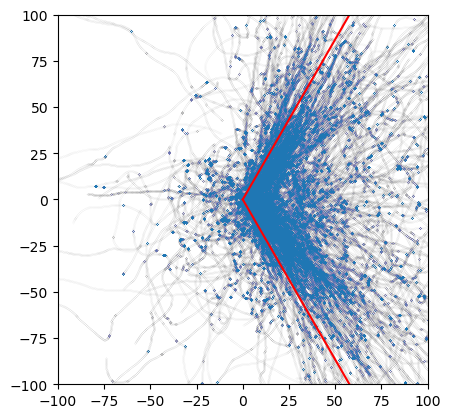

In [13]:
for version in position_version:
    mask = (df["ts"] >= 1000) & (df["ts"] < 6000)
    plt.scatter(-df.loc[mask, version[0]], -df.loc[mask, version[1]], s=0.02, alpha=0.01)

    # plt.scatter(df.loc[mask, 'X'], df.loc[mask, 'Y'], s=0.06, alpha=0.03)
    # plt.scatter(df['X_aligned'][0:9494], df['Y_aligned'][0:9494], s=0.06, alpha=0.03)
    # plt.scatter(df['X'], df['Y'], s=0.06, alpha=0.03)#, c=df['trial_id'], cmap='viridis')
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    plt.gca().set_aspect('equal')

    X = np.linspace(0, 100, 500)

    # Calculate Y based on angle
    angle_deg = 60
    slope = np.tan(np.radians(angle_deg))

    Y = slope * X
    plt.plot(X, Y, color='red')
    plt.plot(X, -Y, color='red')
    # plt.savefig(os.path.join(save_path, f'locustvr_trajectories_{version[0]}.png'), format='png', dpi=300)
    plt.show()

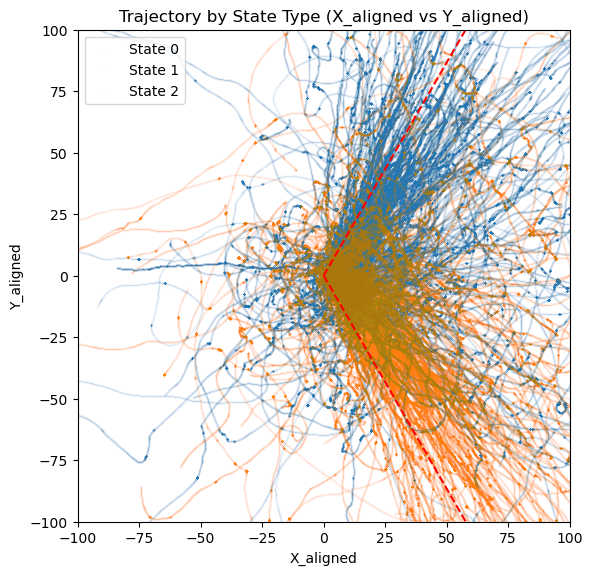

In [15]:
colors = {0: 'C2', 1: 'C0', 2: 'C1'}  # assign colors per state_type

for version in position_version:
    plt.figure(figsize=(6, 6))

    mask = (df["ts"] >= 0) & (df["ts"] < 6000)

    for state in [0, 1, 2]:
        state_mask = mask & (df["state_type"] == state)
        plt.scatter(
            -df.loc[state_mask, version[0]],
            -df.loc[state_mask, version[1]],
            s=0.1, alpha=0.03,
            label=f"State {state}",
            color=colors[state]
        )

    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    plt.gca().set_aspect('equal')

    # Add angle reference lines
    X = np.linspace(0, 100, 500)
    slope = np.tan(np.radians(60))
    plt.plot(X, slope * X, color='red', linestyle='--')
    plt.plot(X, -slope * X, color='red', linestyle='--')

    plt.legend(loc="upper left")
    plt.title(f"Trajectory by State Type ({version[0]} vs {version[1]})")
    plt.xlabel(version[0])
    plt.ylabel(version[1])
    plt.tight_layout()
    plt.show()

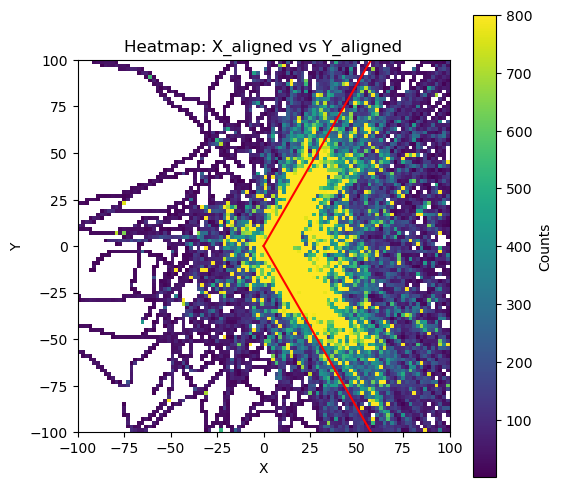

In [17]:
for version in position_version:
    mask = (df["ts"] >= 1000) & (df["ts"] < 6000)
    x = -df.loc[mask, version[0]]
    y = -df.loc[mask, version[1]]

    fig, ax = plt.subplots(figsize=(6, 6))

    # 2D Histogram Heatmap
    heatmap = ax.hist2d(
        x, y,
        bins=[400, 400],
        range=[[-400, 400], [-400, 400]],
        cmap='viridis',
        density=False,
        cmin=1,     # hide empty bins
        vmax=800    # optional: cap for contrast
    )
    fig.colorbar(heatmap[3], ax=ax).set_label("Counts")

    # ±60° guides
    X = np.linspace(0, 100, 500)
    angle_deg = 60
    slope = np.tan(np.radians(angle_deg))
    Y = slope * X
    ax.plot(X, Y, color='red')
    ax.plot(X, -Y, color='red')

    # Plot formatting
    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.set_aspect('equal')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Heatmap: {version[0]} vs {version[1]}")

    # Uncomment if saving
    # plt.savefig(os.path.join(save_path, f'locustvr_trajectories_heatmap_{version[0]}.png'), format='png', dpi=300)
    plt.show()